## ARIMA and Seasonal ARIMA

## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

Visualize the Time Series Data

Make the time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head(20)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [4]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.set_index('Month',inplace=True)

In [10]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


<AxesSubplot:xlabel='Month'>

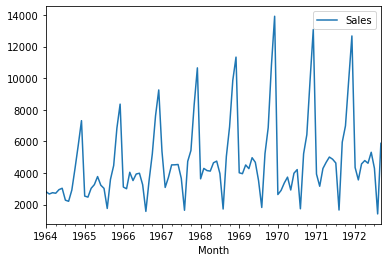

In [11]:
df.plot()

The plot reveals a clear seasonal pattern in the data, with values fluctuating at regular intervals. This indicates the presence of seasonality, which should be considered when selecting forecasting models.

Before proceeding with modeling, it is essential to assess whether the data is stationary. We will use the Augmented Dickey-Fuller (ADF) test to check for stationarity, as most time series models require the input data to be stationary for accurate forecasting.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The results indicate that the data is not stationary. To address this, we will apply differencing to the time series in order to stabilize the mean and achieve stationarity, which is a prerequisite for effective time series modeling.

In [17]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [18]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [19]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448051003
p-value : 2.5196204473870433e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


The low p-value from the ADF test provides strong evidence to reject the null hypothesis of non-stationarity. 

<AxesSubplot:xlabel='Month'>

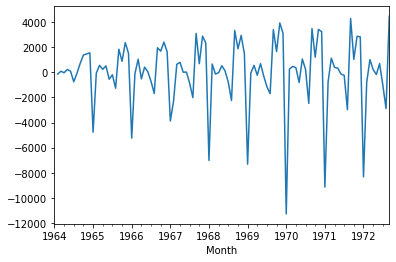

In [20]:
df['Sales First Difference'].plot()

We can see that we have made the data somewhat stationary as it looks centering around a constant mean.

Given the previously observed seasonal pattern in the data, we apply seasonal differencing to remove seasonality and achieve stationarity, ensuring the data is suitable for time series modeling.

In [21]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [22]:
df.head(50)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

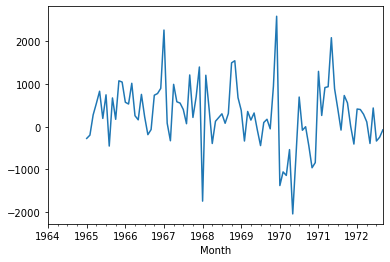

In [24]:
df['Seasonal First Difference'].plot()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [28]:
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

#### We plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to help determine the appropriate orders for both the seasonal and non-seasonal components of the ARIMA and SARIMA models.

C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


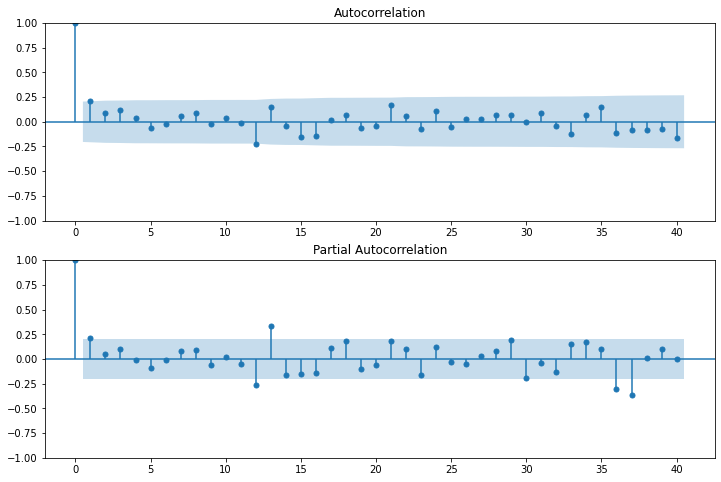

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


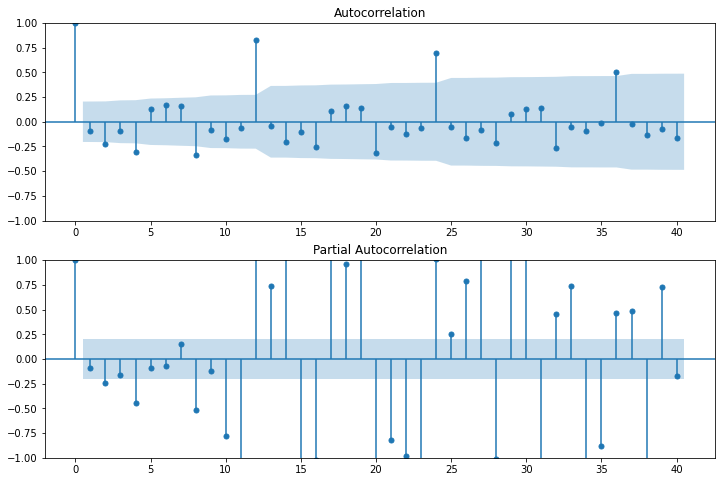

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax2)

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model=ARIMA(df['Sales'],order=(0,0,1))
model_fit_ARIMA=model.fit()

C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


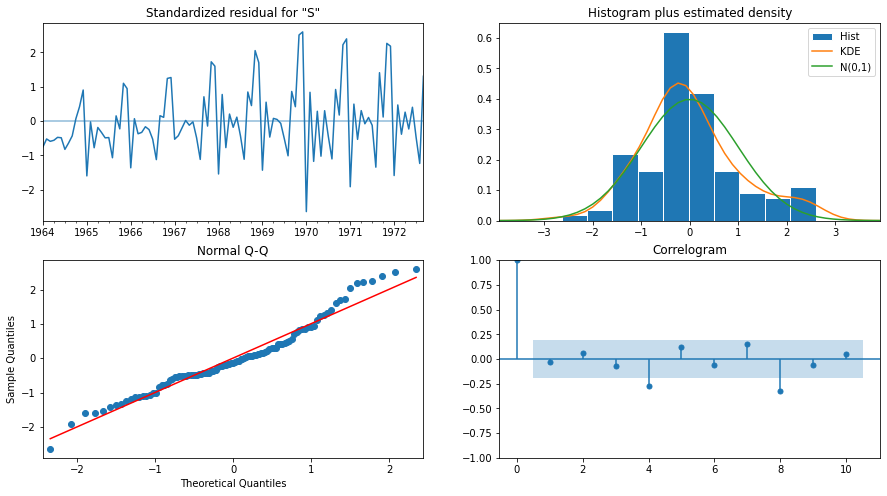

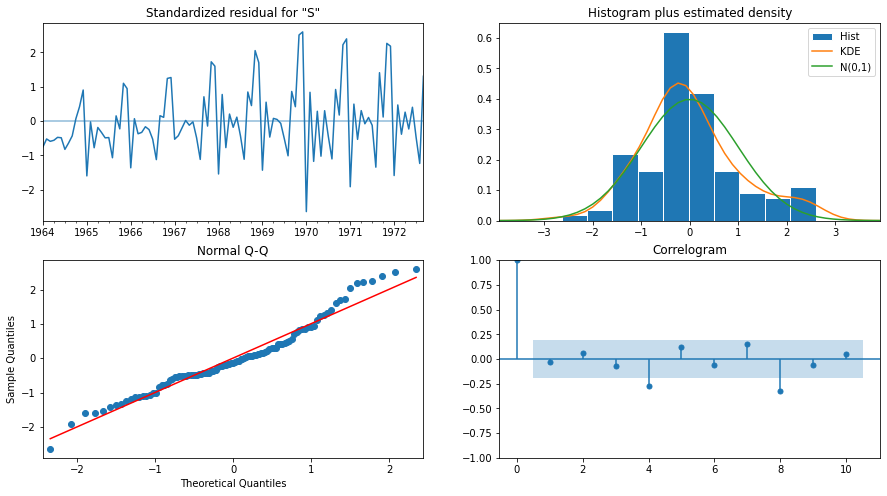

In [95]:
model_fit_ARIMA.plot_diagnostics(figsize=(15, 8))

## Forecasting Using ARIMA

<AxesSubplot:xlabel='Month'>

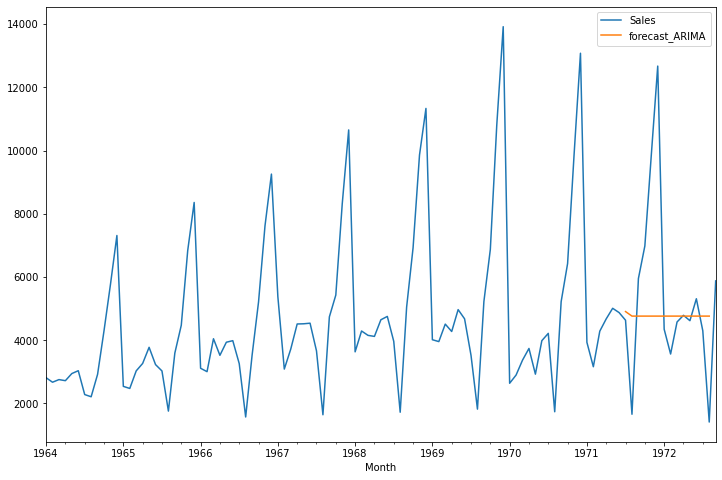

In [41]:
df['forecast_ARIMA']=model_fit_ARIMA.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast_ARIMA']].plot(figsize=(12,8))

In [38]:
model_SARIMA=sm.tsa.statespace.SARIMAX(df['Sales'],order=(0, 0, 1),seasonal_order=(1,1,1,12))
results=model_SARIMA.fit()

C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\absarma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


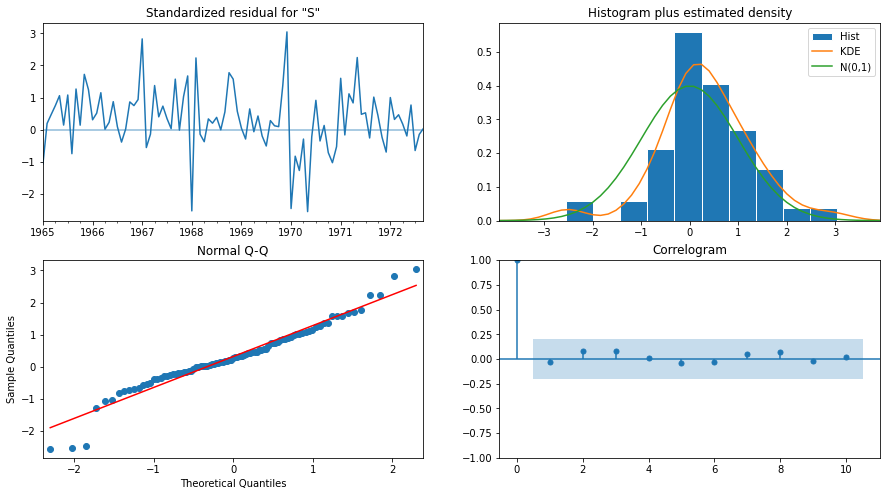

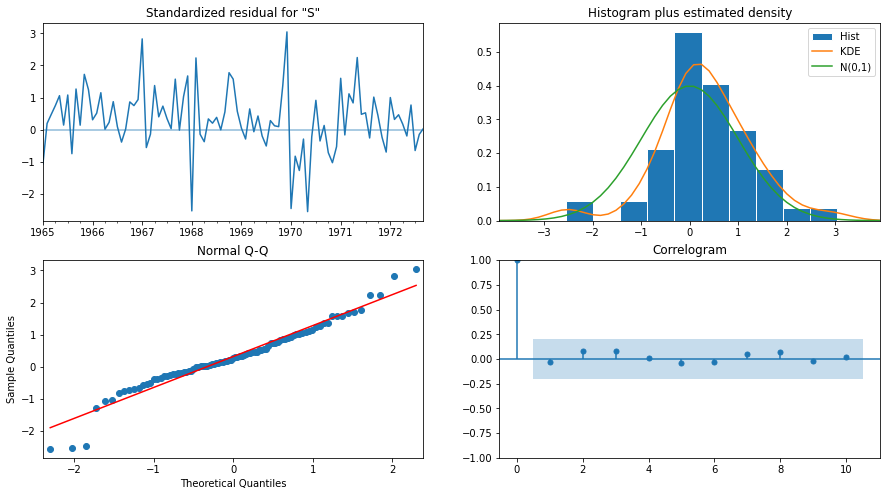

In [97]:
results.plot_diagnostics(figsize=(15, 8))

## Forecasting Using Seasonal Arima (SARIMA)

<AxesSubplot:xlabel='Month'>

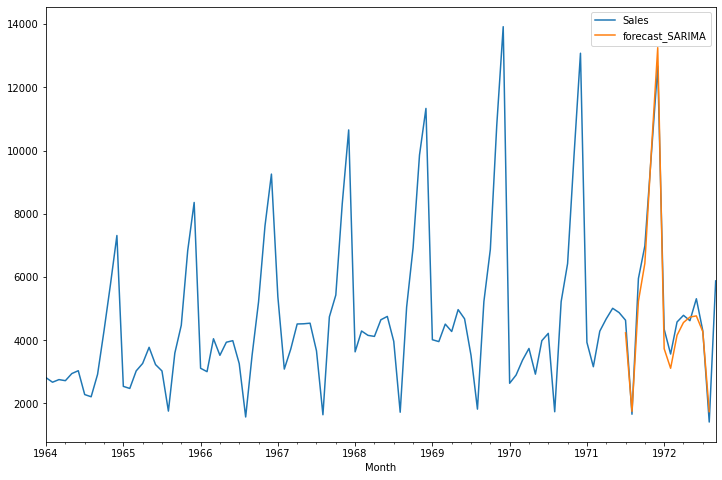

In [43]:
df['forecast_SARIMA']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast_SARIMA']].plot(figsize=(12,8))

#### Next, we evaluate the performance of both models using Root Mean Squared Error (RMSE) and R² (coefficient of determination) scores.

RMSE measures the average magnitude of the prediction errors, providing insight into how closely the model’s predictions align with the actual values—the lower the RMSE, the better the model’s predictive accuracy. 

The R² score indicates the proportion of variance in the observed data that is explained by the model; a higher R² value reflects a better fit. Together, these metrics offer a comprehensive assessment of model performance.

In [47]:
from sklearn.metrics import mean_squared_error

# Select rows 90 to 103 (Python uses zero-based indexing, so this is 90:104)
subset = df.iloc[90:103]

# Calculate RMSE for ARIMA
mse_arima = mean_squared_error(subset['Sales'], subset['forecast_ARIMA'])
rmse_arima = np.sqrt(mse_arima)
# Calculate RMSE for SARIMA
mse_sarima = mean_squared_error(subset['Sales'], subset['forecast_SARIMA'])
rmse_sarima = np.sqrt(mse_sarima)
print(f'RMSE for ARIMA (rows 90-103): {rmse_arima}')
print(f'RMSE for SARIMA (rows 90-103): {rmse_sarima}')

RMSE for ARIMA (rows 90-103): 2863.962108363853
RMSE for SARIMA (rows 90-103): 434.14415010784535


In [49]:
from sklearn.metrics import r2_score 
r2_arima = r2_score(subset['Sales'], subset['forecast_ARIMA'])

# For SARIMA
r2_sarima = r2_score(subset['Sales'], subset['forecast_SARIMA'])

print(f'R² for ARIMA (rows 90-103): {r2_arima}')
print(f'R² for SARIMA (rows 90-103): {r2_sarima}')
r2_scores=[[r2_arima, r2_sarima]]
models = ['ARIMA', 'SARIMA']
plt.plot(models, r2_values, marker='o')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

R² for ARIMA (rows 90-103): -0.10270309817271639
R² for SARIMA (rows 90-103): 0.9746608544437249


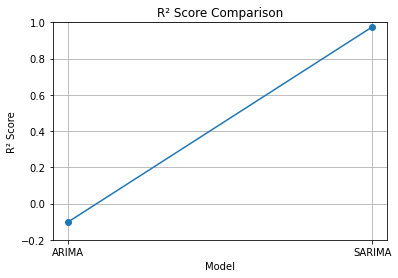

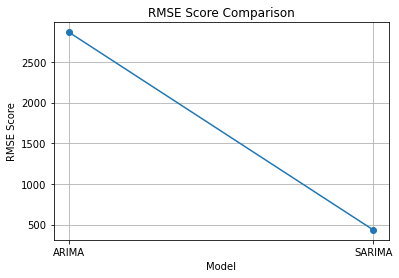

In [73]:
r2_scores=[r2_arima, r2_sarima]
models = ['ARIMA', 'SARIMA']
plt.plot(models, r2_scores, marker='o')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(-0.2, 1)
plt.grid(True)
plt.show()

rmse_scores=[rmse_arima, rmse_sarima]

plt.plot(models, rmse_scores, marker='o')
plt.title('RMSE Score Comparison')
plt.ylabel('RMSE Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

##### We observe that the SARIMA model yields a higher R² score and a lower RMSE compared to the ARIMA model, which is expected given the presence of seasonality in the data. Based on this superior performance, we proceed with forecasting using the SARIMA model.

In [57]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [52]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [60]:
future_df=pd.concat([df,future_datest_df])

### Forecasting future sales for next 16 months using SARIMA 

<AxesSubplot:>

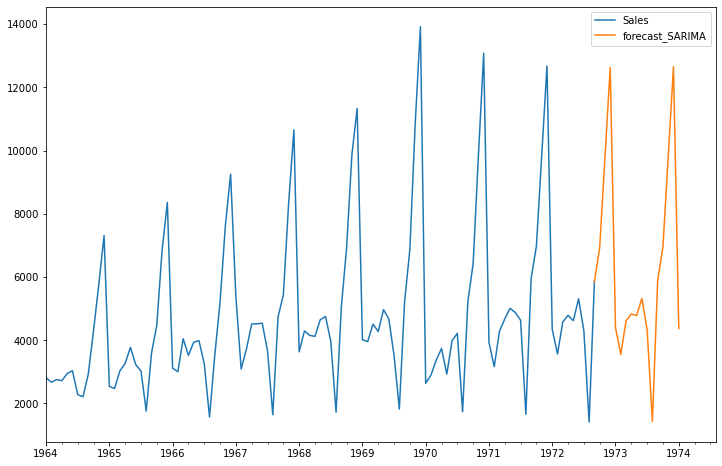

In [62]:
future_df['forecast_SARIMA'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast_SARIMA']].plot(figsize=(12, 8)) 